In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

TRAIN_DATA = '../input/train_folds.csv'

df = pd.read_csv(TRAIN_DATA)
#SHIFT+TAB to see function definition

<BarContainer object of 11 artists>

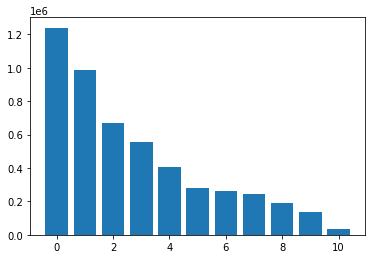

In [5]:
plt.bar(sorted(df.open_channels.unique()), df.open_channels.value_counts().values)